In [1]:
#RANDOM FOREST

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.model_selection import KFold

In [3]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
fraud=pd.read_csv('Company_Data (1).csv')
fraud

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
fraud.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
fraud.head(50)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [8]:
fraud[fraud['Sales'] <= 30000]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
fraud2 = pd.cut(fraud['Sales'],bins=[10003,30000,99619],labels=['Risky','Good'])

In [10]:
fraud2

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
395    NaN
396    NaN
397    NaN
398    NaN
399    NaN
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [11]:
fraud['Sales'] = fraud2
fraud

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,NaN,138,73,11,276,120,Bad,42,17,Yes,Yes
1,NaN,111,48,16,260,83,Good,65,10,Yes,Yes
2,NaN,113,35,10,269,80,Medium,59,12,Yes,Yes
3,NaN,117,100,4,466,97,Medium,55,14,Yes,Yes
4,NaN,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,138,108,17,203,128,Good,33,14,Yes,Yes
396,NaN,139,23,3,37,120,Medium,55,11,No,Yes
397,NaN,162,26,12,368,159,Medium,40,18,Yes,Yes
398,NaN,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
# COMPIETE Fraud dataset

label_encoder = preprocessing.LabelEncoder()
fraud['Sales']= label_encoder.fit_transform(fraud['Sales'])

In [13]:
fraud

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,0,111,48,16,260,83,Good,65,10,Yes,Yes
2,0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [15]:
fraud['Urban']=label_encoder.fit_transform(fraud['Urban']) 
fraud['US']=label_encoder.fit_transform(fraud['US']) 
fraud['ShelveLoc']=label_encoder.fit_transform(fraud['ShelveLoc']) 


In [16]:
fraud

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [17]:
fraud.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [18]:
fraud.dropna(inplace=True)

In [19]:
x=pd.concat([fraud.iloc[:,0:2],fraud.iloc[:,3:6]],axis=1)
y=fraud['Sales']

In [20]:
x

,Sales,CompPrice,Advertising,Population,Price
0,0,138,11,276,120
1,0,111,16,260,83
2,0,113,10,269,80
3,0,117,4,466,97
4,0,141,3,340,128
...,...,...,...,...,...
395,0,138,17,203,128
396,0,139,3,37,120
397,0,162,12,368,159
398,0,100,7,284,95


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: Sales, Length: 400, dtype: int32

In [23]:
fraud['Sales'].unique()

array([0])

In [24]:
fraud['Sales'].value_counts()

0    400
Name: Sales, dtype: int64

In [25]:
colnames = list(fraud.columns)
colnames


['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [26]:
# Splitting data into training and testing data set

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

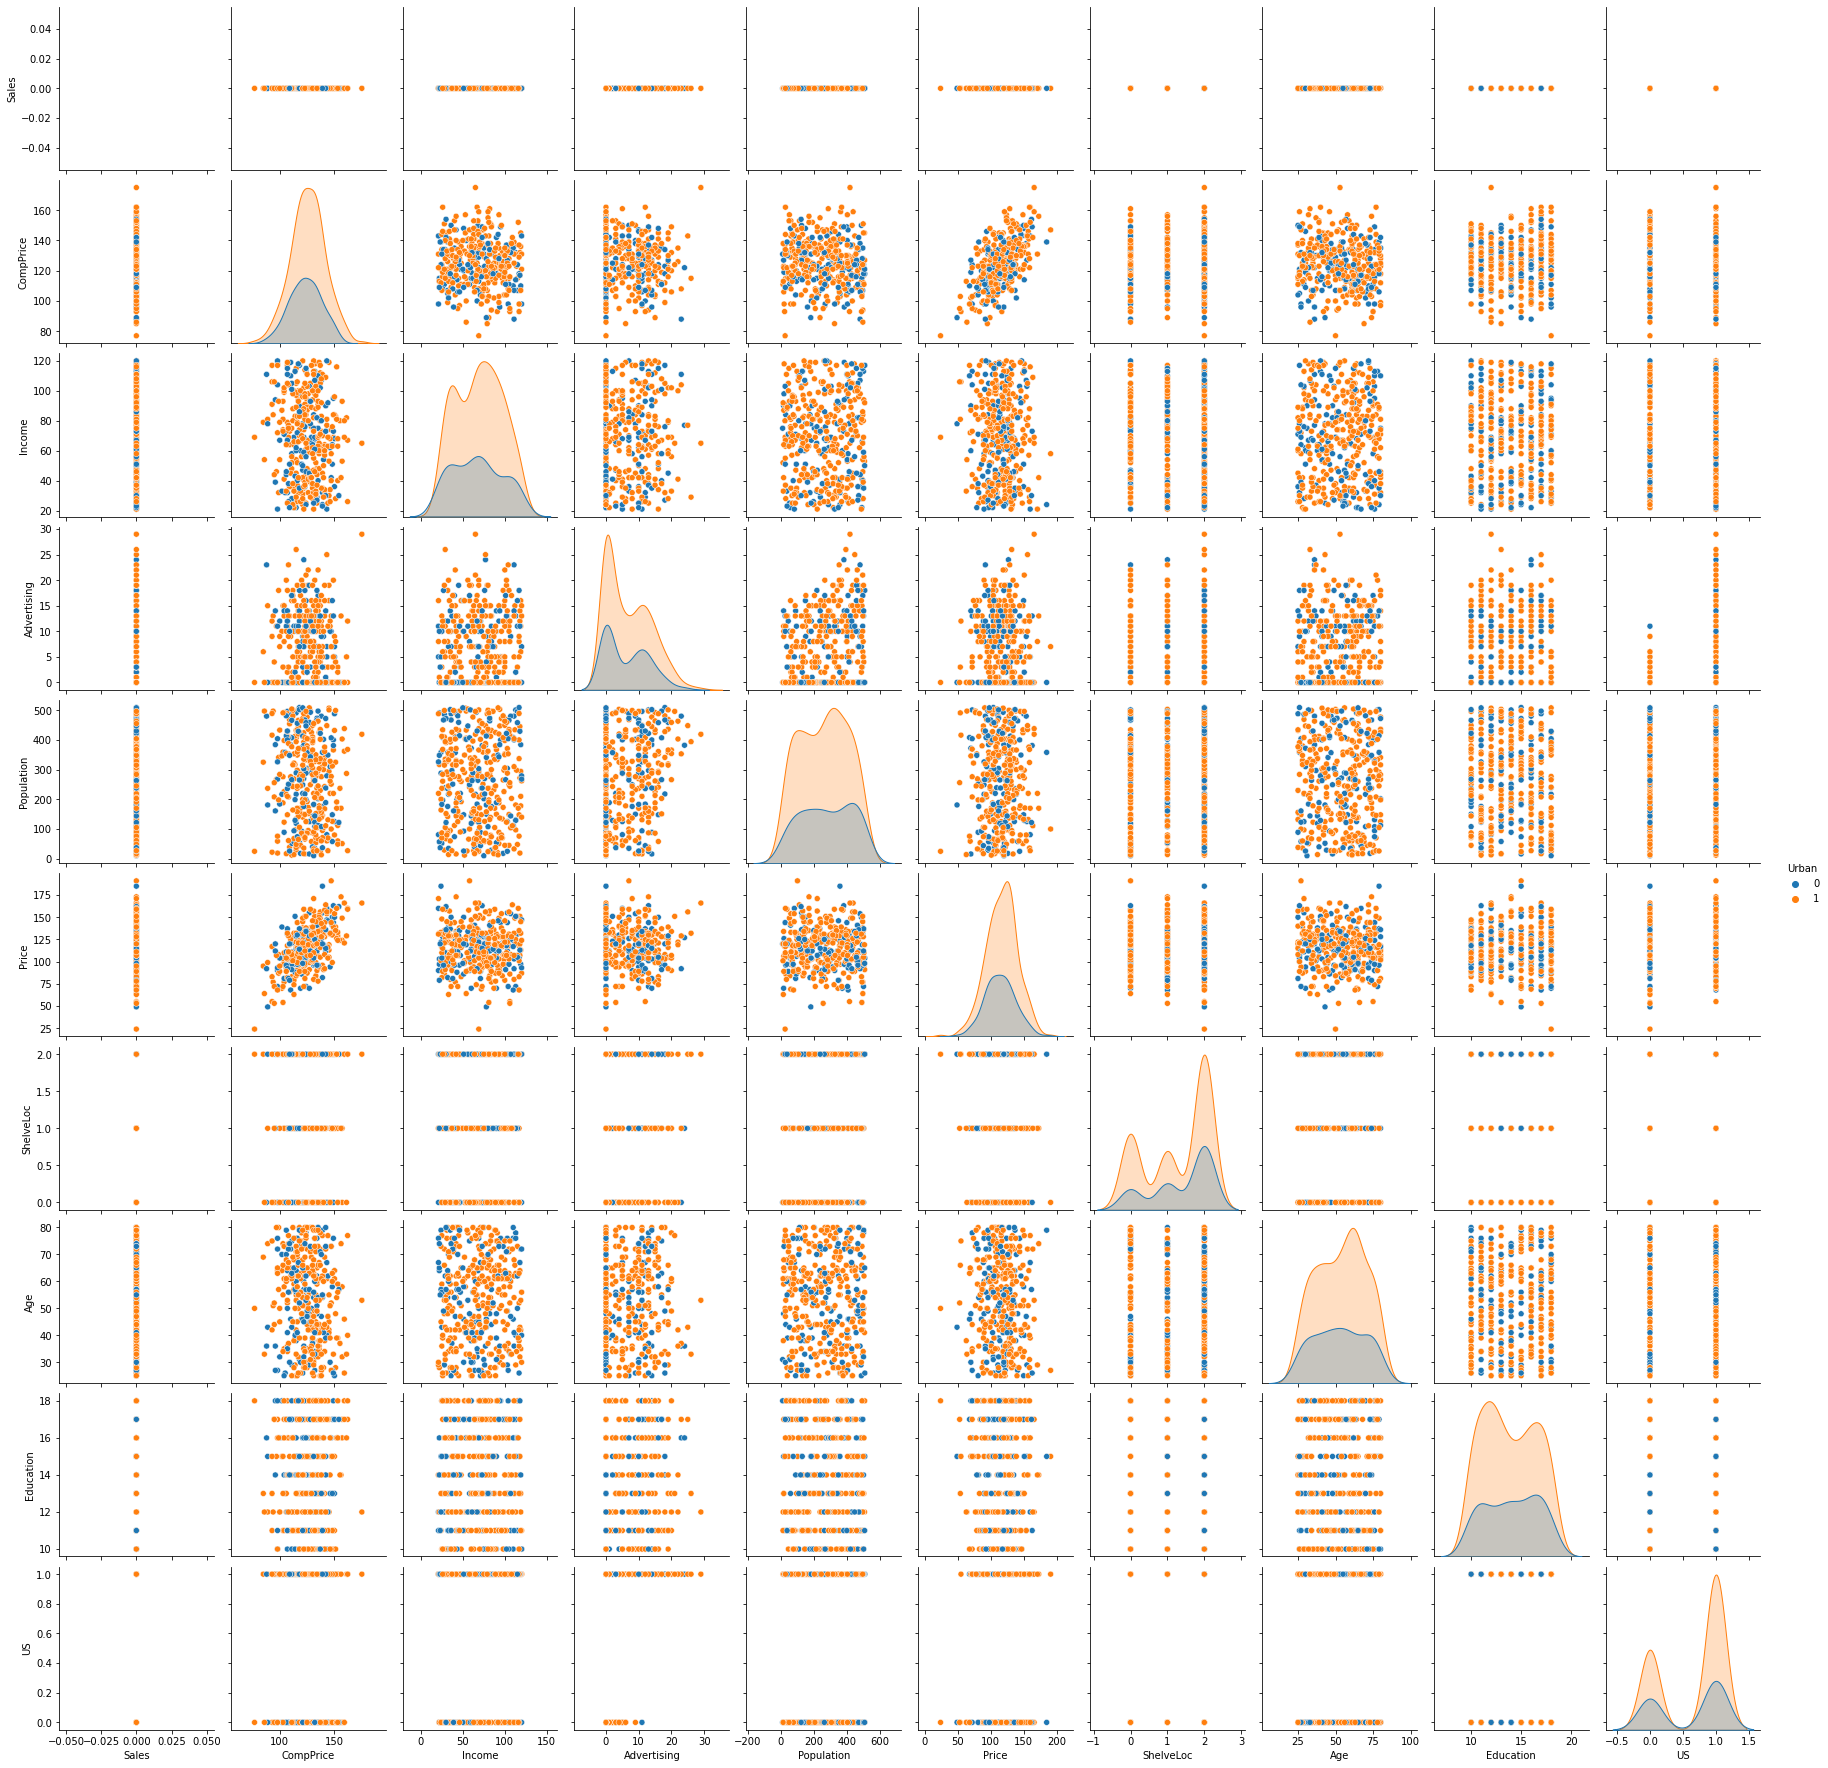

In [27]:
sns.pairplot(data=fraud, hue = 'Urban')

In [28]:
#RANDOM FOREST

In [29]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()) 

1.0


In [30]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed, shuffle = True )
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

1.0
